In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df=pd.read_excel('combine_19_20_21_sale.xlsx')

In [4]:
df.head()

,Unnamed: 0,Created Date,TMAX,Completed_Jobs,tech_count,Avg_Sales,Zip_income,Income
0,0,2019-01-03,68,90,42,6583.000000,100885.000000,100885.0
1,1,2019-01-04,69,85,46,6542.500000,112823.177778,25694.2
2,2,2019-01-05,53,82,22,11057.800000,92705.000000,92705.0
3,3,2019-01-06,58,16,12,5815.000000,41483.776667,14062.0
4,4,2019-01-07,60,89,63,7918.583333,108119.473333,109814.0


In [5]:
df=df.drop(['Unnamed: 0'],axis=1)

In [6]:
df.columns

Index(['Created Date', 'TMAX', 'Completed_Jobs', 'tech_count', 'Avg_Sales',
       'Zip_income', 'Income'],
      dtype='object')

<AxesSubplot:>

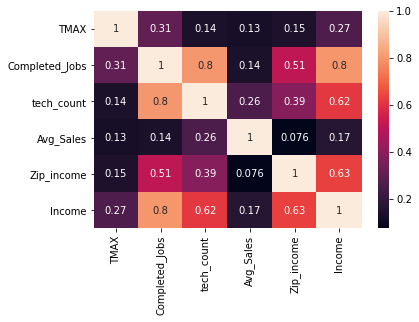

In [7]:
sns.heatmap(df.corr(method='spearman'),annot=True)

In [8]:
df['year'] = df['Created Date'].dt.year
df['month'] = df['Created Date'].dt.month
df['day'] = df['Created Date'].dt.month


df['weekday'] = df['Created Date'].dt.dayofweek

df['quarter'] = df['Created Date'].dt.quarter

In [9]:
df=df.drop(['Created Date'],axis=1)

In [10]:
def encode(data, col, max_val):
    data[col + '_sin'] = np.sin(2 * np.pi * data[col]/max_val)
    data[col + '_cos'] = np.cos(2 * np.pi * data[col]/max_val)
    return data

In [11]:
encode(df,'month',12)
encode(df,'day',365)
encode(df,'weekday',7)
encode(df,'quarter',4)

,TMAX,Completed_Jobs,tech_count,Avg_Sales,Zip_income,Income,year,month,day,weekday,quarter,month_sin,month_cos,day_sin,day_cos,weekday_sin,weekday_cos,quarter_sin,quarter_cos
0,68,90,42,6583.000000,100885.000000,100885.00,2019,1,1,3,1,0.500000,0.866025,0.017213,0.999852,0.433884,-0.900969,1.000000e+00,6.123234e-17
1,69,85,46,6542.500000,112823.177778,25694.20,2019,1,1,4,1,0.500000,0.866025,0.017213,0.999852,-0.433884,-0.900969,1.000000e+00,6.123234e-17
2,53,82,22,11057.800000,92705.000000,92705.00,2019,1,1,5,1,0.500000,0.866025,0.017213,0.999852,-0.974928,-0.222521,1.000000e+00,6.123234e-17
3,58,16,12,5815.000000,41483.776667,14062.00,2019,1,1,6,1,0.500000,0.866025,0.017213,0.999852,-0.781831,0.623490,1.000000e+00,6.123234e-17
4,60,89,63,7918.583333,108119.473333,109814.00,2019,1,1,0,1,0.500000,0.866025,0.017213,0.999852,0.000000,1.000000,1.000000e+00,6.123234e-17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
721,81,222,126,3494.939333,210099.110000,210099.11,2021,4,4,4,2,0.866025,-0.500000,0.068802,0.997630,-0.433884,-0.900969,1.224647e-16,-1.000000e+00
722,68,168,75,4079.521639,119775.950000,119775.95,2021,5,5,5,2,0.500000,-0.866025,0.085965,0.996298,-0.974928,-0.222521,1.224647e-16,-1.000000e+00
723,69,202,124,3481.447857,230699.430000,230699.43,2021,5,5,2,2,0.500000,-0.866025,0.085965,0.996298,0.974928,-0.222521,1.224647e-16,-1.000000e+00
724,68,109,75,4314.042857,112431.950000,112431.95,2021,5,5,5,2,0.500000,-0.866025,0.085965,0.996298,-0.974928,-0.222521,1.224647e-16,-1.000000e+00


In [12]:
df=df.drop(['month', 'day', 'weekday', 'quarter'],axis=1)

In [13]:
df['year'] = df['year'].map({2019: 0, 2020: 1,2021:2})

In [14]:
df['f1']=np.abs(df['Completed_Jobs'])*np.abs(df['Zip_income'])
df['f2']=np.sqrt(df['Completed_Jobs']**3)*np.abs(df['Avg_Sales'])
df['f3']=np.abs(np.sqrt(df['Completed_Jobs']) - np.sqrt(df['tech_count']))
df['f4']=np.log(np.sqrt(df['Completed_Jobs'])*df['TMAX']**3)

In [15]:
df1=df[['f1', 'f2','f3', 'f4','year',  'month_cos',  'quarter_sin','Income']]

In [16]:
df1=df1.drop_duplicates(ignore_index=True)

<AxesSubplot:>

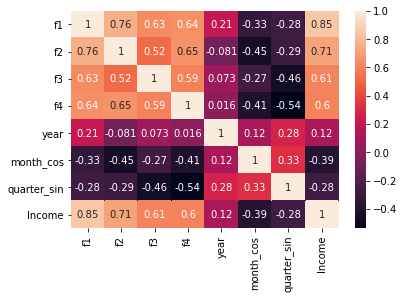

In [17]:
sns.heatmap(df1.corr(method='spearman'),annot=True)

In [18]:
train=df1[0:600]
test=df1[600:]

In [19]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()


In [20]:
y=train['Income']
X=train.drop(['Income'],axis=1)

In [21]:
X=scaler.fit_transform(X)

In [22]:
y=y.values

In [23]:
y=y.reshape(-1,1)

In [24]:
y=scaler.fit_transform(y)

In [25]:
X[0]

array([ 0.03004712,  0.02884931,  0.25291956, -0.25688656, -1.0270319 ,
        1.26653075,  1.40483811])

In [26]:
y[0]

array([0.14240624])

In [27]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [28]:
from sklearn.svm import SVR
regressor = SVR(kernel = 'rbf')
regressor.fit(X_train, y_train)

C:\Users\vksva\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


SVR()

In [29]:
regressor.score(X_train,y_train)

0.7315653430755813

In [30]:
    regressor.score(X_test,y_test)

0.7469956673687403

In [31]:
y_=test['Income']
X_=test.drop(['Income'],axis=1)

In [32]:
X_=scaler.fit_transform(X_)

In [33]:
y_=y_.values

In [34]:
y_=y_.reshape(-1,1)

In [35]:
y_=scaler.fit_transform(y_)

In [36]:
y_

array([[-0.40067817],
       [-0.52240875],
       [-0.07952246],
       [-0.21488156],
       [-0.01222933],
       [-0.16559742],
       [-0.56650644],
       [-0.70378894],
       [ 0.33820712],
       [ 1.20534802],
       [-0.71549989],
       [ 0.37691305],
       [-1.18736535],
       [-1.9196551 ],
       [ 0.21692456],
       [-0.26198217],
       [-0.27481406],
       [-0.63297632],
       [-0.820203  ],
       [-1.03868016],
       [-1.12324521],
       [-0.23940678],
       [-0.14709846],
       [-0.93915169],
       [-0.39830535],
       [-0.39830535],
       [-1.19279202],
       [-1.64320972],
       [ 0.35187089],
       [-0.27527812],
       [ 1.19365575],
       [-1.34862229],
       [-0.95013597],
       [ 0.42337987],
       [-0.36099213],
       [-0.75588388],
       [-0.73900957],
       [-0.70378894],
       [ 0.35342187],
       [ 0.33820712],
       [-0.75970299],
       [ 1.95236485],
       [ 1.20534802],
       [-0.71549989],
       [-0.26198217],
       [-1

In [37]:
regressor.score(X_,y_)

0.7036478292769792

In [38]:
y_pred= regressor.predict(X_)

In [39]:
y_pred=scaler.inverse_transform(y_pred)

In [40]:
y_pred

array([110867.39359867, 110164.35760147, 109669.5909061 , 114492.37095376,
       116401.58239323, 116926.72020846, 114532.2538947 ,  67204.09779882,
       134355.17395065, 148302.85000777,  80312.68505505, 107828.3113829 ,
        55978.39964073,  13218.04271071,  95619.16368899, 101071.96635787,
       113455.43852798, 112326.25395198,  74742.07141278,  12148.95300093,
        78931.10191271,  98025.92625205, 104136.86539037,  65480.66221041,
        83692.59470213,  98475.74929237,  49112.72423127,  26952.21038738,
       140736.47137085, 121407.4595508 , 119845.94939356,  53307.91752828,
        16893.93449955, 133610.26489504, 129509.52990675,  84894.13665314,
        77434.30752183,  49209.23220161, 121040.27178213, 112765.76883346,
       102782.86418252, 139827.08921822, 155614.73373319,  67587.02200021,
        76319.54168989,  45907.63505612, 101819.00502654,  90744.91300324,
        99288.11756637, 188436.10516323,  49771.09277284,  61452.18432131,
        86925.96832065,  

In [41]:
y_=scaler.inverse_transform(y_)

In [42]:
y_=y_.flatten()

In [43]:
y_.shape

(126,)

In [44]:
comp=pd.DataFrame({'Actual':y_,'Predicted':y_pred})

In [45]:
comp.head()

,Actual,Predicted
0,86287.17,110867.393599
1,79380.38,110164.357601
2,104509.01,109669.590906
3,96828.96,114492.370954
4,108327.11,116401.582393


<AxesSubplot:>

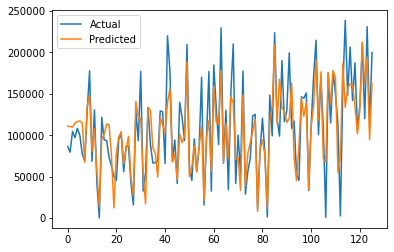

In [46]:
comp.plot()

In [47]:
from sklearn import metrics

In [48]:
# RMSE and MAE
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_,y_pred)))
print('MAE:',metrics.mean_absolute_error(y_,y_pred))


RMSE: 30887.348905910472
MAE: 23277.80174281108


In [49]:
from sklearn.model_selection import GridSearchCV

In [50]:
parameters = [{'kernel': ['rbf'], 'gamma': [1e-4, 1e-3, 0.01, 0.1, 0.2, 0.5, 0.6, 0.9],'C': [1, 10, 100, 1000, 10000]}]
print("Tuning hyper-parameters")
svr = GridSearchCV(SVR(epsilon = 0.01), parameters, cv = 5)
svr.fit(X, y)

Tuning hyper-parameters


C:\Users\vksva\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\vksva\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\vksva\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\vksva\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**

C:\Users\vksva\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\vksva\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\vksva\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\vksva\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**

C:\Users\vksva\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\vksva\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\vksva\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\vksva\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**

C:\Users\vksva\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\vksva\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\vksva\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\vksva\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**

C:\Users\vksva\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\vksva\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\vksva\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\vksva\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**

C:\Users\vksva\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\vksva\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\vksva\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\vksva\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**

GridSearchCV(cv=5, estimator=SVR(epsilon=0.01),
             param_grid=[{'C': [1, 10, 100, 1000, 10000],
                          'gamma': [0.0001, 0.001, 0.01, 0.1, 0.2, 0.5, 0.6,
                                    0.9],
                          'kernel': ['rbf']}])

In [53]:
print("Grid scores on training set:")
means = svr.cv_results_['mean_test_score']
stds = svr.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, svr.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r"% (mean, std * 2, params))

Grid scores on training set:
0.038 (+/-0.394) for {'C': 1, 'gamma': 0.0001, 'kernel': 'rbf'}
0.458 (+/-0.396) for {'C': 1, 'gamma': 0.001, 'kernel': 'rbf'}
0.555 (+/-0.362) for {'C': 1, 'gamma': 0.01, 'kernel': 'rbf'}
0.521 (+/-0.239) for {'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}
0.435 (+/-0.195) for {'C': 1, 'gamma': 0.2, 'kernel': 'rbf'}
0.218 (+/-0.300) for {'C': 1, 'gamma': 0.5, 'kernel': 'rbf'}
0.162 (+/-0.311) for {'C': 1, 'gamma': 0.6, 'kernel': 'rbf'}
0.028 (+/-0.328) for {'C': 1, 'gamma': 0.9, 'kernel': 'rbf'}
0.460 (+/-0.398) for {'C': 10, 'gamma': 0.0001, 'kernel': 'rbf'}
0.521 (+/-0.387) for {'C': 10, 'gamma': 0.001, 'kernel': 'rbf'}
0.550 (+/-0.315) for {'C': 10, 'gamma': 0.01, 'kernel': 'rbf'}
0.396 (+/-0.263) for {'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}
0.232 (+/-0.329) for {'C': 10, 'gamma': 0.2, 'kernel': 'rbf'}
0.091 (+/-0.302) for {'C': 10, 'gamma': 0.5, 'kernel': 'rbf'}
0.076 (+/-0.327) for {'C': 10, 'gamma': 0.6, 'kernel': 'rbf'}
-0.002 (+/-0.442) for {'C': 10, 'gamm

In [54]:
# tuning 

tuned_svm = SVR(C=100,gamma=0.001,kernel='rbf')

In [55]:
tuned_svm.fit(X_train,y_train)

C:\Users\vksva\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


SVR(C=100, gamma=0.001)

In [56]:
tuned_svm.score(X_train,y_train)

0.6823253038970476

In [57]:
    tuned_svm.score(X_test,y_test)

0.7670223628517762

In [58]:
tuned_svm.score(X_,y_)

-3.6920235704203366

In [59]:
y_pred_1=tuned_svm.predict(X_)

In [60]:
    y_pred_1=scaler.inverse_transform(y_pred_1)

In [61]:
y_

array([8.6287170e+04, 7.9380380e+04, 1.0450901e+05, 9.6828960e+04,
       1.0832711e+05, 9.9625260e+04, 7.6878350e+04, 6.9089170e+04,
       1.2821029e+05, 1.7741042e+05, 6.8424710e+04, 1.3040640e+05,
       4.1651850e+04, 1.0295000e+02, 1.2132892e+05, 9.4156550e+04,
       9.3428490e+04, 7.3106960e+04, 6.2484030e+04, 5.0088000e+04,
       4.5289920e+04, 9.5437440e+04, 1.0067486e+05, 5.5735080e+04,
       8.6421800e+04, 8.6421800e+04, 4.1343950e+04, 1.5788000e+04,
       1.2898555e+05, 9.3402160e+04, 1.7674702e+05, 3.2502400e+04,
       5.5111850e+04, 1.3304285e+05, 8.8538890e+04, 6.6133390e+04,
       6.7090810e+04, 6.9089170e+04, 1.2907355e+05, 1.2821029e+05,
       6.5916700e+04, 2.1979491e+05, 1.7741042e+05, 6.8424710e+04,
       9.4156550e+04, 4.1651850e+04, 1.3959161e+05, 1.2132892e+05,
       9.3428490e+04, 2.0925609e+05, 6.2484030e+04, 4.5289920e+04,
       9.5437440e+04, 5.5735080e+04, 8.6421800e+04, 1.6970471e+05,
       1.5788000e+04, 9.3402160e+04, 1.7674702e+05, 3.2502400e

In [62]:
comp_1=pd.DataFrame({'Actual':y_,'Predicted':y_pred_1})

<AxesSubplot:>

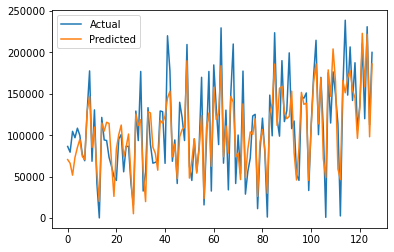

In [63]:
comp_1.plot()

In [64]:
# RMSE and MAE
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_,y_pred_1)))
print('MAE:',metrics.mean_absolute_error(y_,y_pred_1))


RMSE: 28420.048620306065
MAE: 22155.758762005746


In [65]:
comp_1

,Actual,Predicted
0,86287.17,70474.018078
1,79380.38,66043.364688
2,104509.01,51681.076134
3,96828.96,73092.770319
4,108327.11,85160.896763
...,...,...
121,210099.11,222729.734841
122,119775.95,158280.922084
123,230699.43,221627.867340
124,112431.95,97983.963808
